# Python Machine Learning - Code Examples

Note that the optional watermark extension is a small IPython notebook plugin that I developed to make the code reproducible. You can just skip the following line(s).

In [1]:
%load_ext watermark
%watermark -u -d -v -p numpy,tensorflow,matplotlib

last updated: 2019-02-04 

CPython 3.6.8
IPython 6.2.1

numpy 1.15.4
tensorflow 2.0.0-preview
matplotlib 3.0.2


*The use of `watermark` is optional. You can install this IPython extension via "`pip install watermark`". For more information, please see: https://github.com/rasbt/watermark.*

# Chapter 14 - Going Deeper: The Mechanics of TensorFlow

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

## TensorFlow in a nutshell

**How to get the rank and shape of a tensor**

In [3]:
## t1, t2, t3 텐서를 정의합니다.
t1 = tf.constant(np.pi)
t2 = tf.constant([1, 2, 3, 4])
t3 = tf.constant([[1, 2], [3, 4]])

## 랭크를 구합니다.
r1 = tf.rank(t1)
r2 = tf.rank(t2)
r3 = tf.rank(t3)

## 크기를 구합니다
s1 = t1.get_shape()
s2 = t2.get_shape()
s3 = t3.get_shape()
print('크기:', s1, s2, s3)

print('랭크:', 
      r1.numpy(), 
      r2.numpy(), 
      r3.numpy())

크기: () (4,) (2, 2)
랭크: 0 1 2


## Understanding TensorFlow's computation graph

In [4]:
a = tf.constant(1)
b = tf.constant(2) 
c = tf.constant(3) 

z = 2*(a-b) + c

print('2*(a-b)+c => ', z.numpy())

2*(a-b)+c =>  1


In [5]:
## 텐서플로 1.x 방식
g = tf.Graph()
 
## 그래프에 노드를 추가합니다.
with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b') 
    c = tf.constant(3, name='c') 

    z = 2*(a-b) + c
    
## 그래프를 실행합니다.
with tf.compat.v1.Session(graph=g) as sess:
    print('2*(a-b)+c => ', sess.run(z))

2*(a-b)+c =>  1


In [6]:
g.get_operations()

[<tf.Operation 'a' type=Const>,
 <tf.Operation 'b' type=Const>,
 <tf.Operation 'c' type=Const>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'mul/x' type=Const>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=Add>]

In [7]:
g.as_graph_def()

node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "c"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 3
      }
    }
  }
}
node {
  name: "sub"
  op: "Sub"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "mul/x"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    ke

In [8]:
@tf.function
def simple_func():
    a = tf.constant(1)
    b = tf.constant(2) 
    c = tf.constant(3) 

    z = 2*(a-b) + c
    return z

print('2*(a-b)+c => ', simple_func().numpy())

2*(a-b)+c =>  1


In [9]:
print(simple_func.__class__)

<class 'tensorflow.python.eager.def_function.Function'>


In [10]:
def simple_func():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b') 
    c = tf.constant(3, name='c') 

    z = 2*(a-b) + c
    return z

simple_func = tf.function(simple_func)

print('2*(a-b)+c => ', simple_func().numpy())

2*(a-b)+c =>  1


In [11]:
con_func = simple_func.get_concrete_function()
con_func.graph.get_operations()

[<tf.Operation 'a' type=Const>,
 <tf.Operation 'b' type=Const>,
 <tf.Operation 'c' type=Const>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'mul/x' type=Const>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=Add>,
 <tf.Operation 'Identity' type=Identity>]

In [12]:
con_func.graph.as_graph_def()

node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "c"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 3
      }
    }
  }
}
node {
  name: "sub"
  op: "Sub"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "mul/x"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    ke

## Working with TensorFlow’s variables, and operations

### Variables in TensorFlow


#### Defining Variables

In [13]:
g1 = tf.Graph()

with g1.as_default():
    w1 = tf.Variable(np.array([[1, 2, 3, 4],
                              [5, 6, 7, 8]]), name='w1')
print(w1)

<tf.Variable 'w1:0' shape=(2, 4) dtype=int64>


In [14]:
g1.get_operations()

[<tf.Operation 'w1/Initializer/initial_value' type=Const>,
 <tf.Operation 'w1' type=VarHandleOp>,
 <tf.Operation 'w1/IsInitialized/VarIsInitializedOp' type=VarIsInitializedOp>,
 <tf.Operation 'w1/Assign' type=AssignVariableOp>,
 <tf.Operation 'w1/Read/ReadVariableOp' type=ReadVariableOp>]

In [15]:
with g1.as_default():
    init = tf.compat.v1.global_variables_initializer()
    print(init.node_def)

name: "init"
op: "NoOp"
input: "^w1/Assign"



In [16]:
with g1.as_default():
    w1 = w1 + 1
    print(w1)
    
with tf.compat.v1.Session(graph=g1) as sess:
    init = tf.compat.v1.global_variables_initializer()
    sess.run(init)
    print(sess.run(w1))
    print(sess.run(w1))

Tensor("add:0", shape=(2, 4), dtype=int64)
[[2 3 4 5]
 [6 7 8 9]]
[[2 3 4 5]
 [6 7 8 9]]


In [17]:
g2 = tf.Graph()

with g2.as_default():
    w1 = tf.Variable(np.array([[1, 2, 3, 4],
                              [5, 6, 7, 8]]), name='w1')
    w1 = w1.assign(w1 + 1)

with tf.compat.v1.Session(graph=g2) as sess:
    init = tf.compat.v1.global_variables_initializer()
    sess.run(init)
    print(sess.run(w1))
    print(sess.run(w1))

[[2 3 4 5]
 [6 7 8 9]]
[[ 3  4  5  6]
 [ 7  8  9 10]]


In [18]:
w2 = tf.Variable(np.array([[1, 2, 3, 4],
                          [5, 6, 7, 8]]), name='w2')
print(w2)

<tf.Variable 'w2:0' shape=(2, 4) dtype=int64, numpy=
array([[1, 2, 3, 4],
       [5, 6, 7, 8]])>


In [19]:
w2.assign(w2 + 1)
print(w2.numpy())
w2.assign(w2 + 1)
print(w2.numpy())

[[2 3 4 5]
 [6 7 8 9]]
[[ 3  4  5  6]
 [ 7  8  9 10]]


In [20]:
print(w2)

<tf.Variable 'w2:0' shape=(2, 4) dtype=int64, numpy=
array([[ 3,  4,  5,  6],
       [ 7,  8,  9, 10]])>


## 케라스 API 자세히 배우기

### Sequential 모델

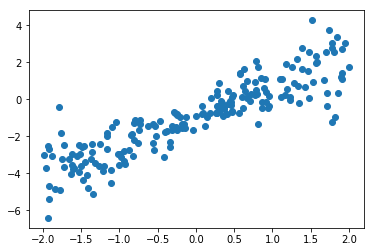

In [21]:
## create a random toy dataset for regression

np.random.seed(0)

def make_random_data():
    x = np.random.uniform(low=-2, high=2, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, 
                             scale=(0.5 + t*t/3), 
                             size=None)
        y.append(r)
    return  x, 1.726*x -0.84 + np.array(y)


x, y = make_random_data() 

plt.plot(x, y, 'o')
# plt.savefig('images/14_03.png', dpi=300)
plt.show()

In [22]:
x_train, y_train = x[:150], y[:150]
x_test, y_test = x[150:], y[150:]

In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(units=1, input_dim=1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=500, 
                    validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/500
105/105==============================] - 0s 655us/sample - loss: 3.5764 - val_loss: 2.4064
Epoch 2/500
105/105==============================] - 0s 41us/sample - loss: 3.5192 - val_loss: 2.3748
Epoch 3/500
105/105==============================] - 0s 48us/sample - loss: 3.4626 - val_loss: 2.3428
Epoch 4/500
105/105==============================] - 0s 46us/sample - loss: 3.4050 - val_loss: 2.3114
Epoch 5/500
105/105==============================] - 0s 36us/sample - loss: 3.3495 - val_loss: 2.2813
Epoch 6/500
105/105==============================] - 0s 35us/sample - loss: 3.2949 - val_loss: 2.2537
Epoch 7/500
105/105==============================] - 0s 34us/sample - loss: 3.2460 - val_loss: 2.2263
Epoch 8/500
105/105==============================] - 0s 51us/sample - loss: 3.1960 - val_loss: 2.1984
Epoch 9/500
105/105==============================] - 0s 49us/sample - loss: 3.1459 - val_loss: 2.1713
Epoch 10/500
105/105================

105/105==============================] - 0s 36us/sample - loss: 1.3181 - val_loss: 1.1789
Epoch 81/500
105/105==============================] - 0s 35us/sample - loss: 1.3062 - val_loss: 1.1728
Epoch 82/500
105/105==============================] - 0s 49us/sample - loss: 1.2953 - val_loss: 1.1672
Epoch 83/500
105/105==============================] - 0s 37us/sample - loss: 1.2850 - val_loss: 1.1615
Epoch 84/500
105/105==============================] - 0s 36us/sample - loss: 1.2748 - val_loss: 1.1566
Epoch 85/500
105/105==============================] - 0s 36us/sample - loss: 1.2654 - val_loss: 1.1499
Epoch 86/500
105/105==============================] - 0s 41us/sample - loss: 1.2537 - val_loss: 1.1445
Epoch 87/500
105/105==============================] - 0s 48us/sample - loss: 1.2443 - val_loss: 1.1397
Epoch 88/500
105/105==============================] - 0s 40us/sample - loss: 1.2352 - val_loss: 1.1347
Epoch 89/500
105/105==============================] - 0s 39us/sample - loss: 1.2264 - 

105/105==============================] - 0s 37us/sample - loss: 0.8694 - val_loss: 0.9379
Epoch 160/500
105/105==============================] - 0s 41us/sample - loss: 0.8670 - val_loss: 0.9364
Epoch 161/500
105/105==============================] - 0s 41us/sample - loss: 0.8647 - val_loss: 0.9354
Epoch 162/500
105/105==============================] - 0s 50us/sample - loss: 0.8624 - val_loss: 0.9342
Epoch 163/500
105/105==============================] - 0s 57us/sample - loss: 0.8597 - val_loss: 0.9325
Epoch 164/500
105/105==============================] - 0s 41us/sample - loss: 0.8569 - val_loss: 0.9314
Epoch 165/500
105/105==============================] - 0s 42us/sample - loss: 0.8553 - val_loss: 0.9303
Epoch 166/500
105/105==============================] - 0s 43us/sample - loss: 0.8528 - val_loss: 0.9290
Epoch 167/500
105/105==============================] - 0s 34us/sample - loss: 0.8509 - val_loss: 0.9280
Epoch 168/500
105/105==============================] - 0s 34us/sample - loss: 

Epoch 238/500
105/105==============================] - 0s 51us/sample - loss: 0.7809 - val_loss: 0.8951
Epoch 239/500
105/105==============================] - 0s 39us/sample - loss: 0.7803 - val_loss: 0.8951
Epoch 240/500
105/105==============================] - 0s 39us/sample - loss: 0.7800 - val_loss: 0.8950
Epoch 241/500
105/105==============================] - 0s 34us/sample - loss: 0.7794 - val_loss: 0.8950
Epoch 242/500
105/105==============================] - 0s 40us/sample - loss: 0.7789 - val_loss: 0.8948
Epoch 243/500
105/105==============================] - 0s 40us/sample - loss: 0.7785 - val_loss: 0.8950
Epoch 244/500
105/105==============================] - 0s 41us/sample - loss: 0.7783 - val_loss: 0.8947
Epoch 245/500
105/105==============================] - 0s 51us/sample - loss: 0.7778 - val_loss: 0.8943
Epoch 246/500
105/105==============================] - 0s 43us/sample - loss: 0.7776 - val_loss: 0.8942
Epoch 247/500
105/105==============================] - 0s 32us/s

Epoch 317/500
105/105==============================] - 0s 49us/sample - loss: 0.7608 - val_loss: 0.8932
Epoch 318/500
105/105==============================] - 0s 37us/sample - loss: 0.7607 - val_loss: 0.8933
Epoch 319/500
105/105==============================] - 0s 36us/sample - loss: 0.7606 - val_loss: 0.8934
Epoch 320/500
105/105==============================] - 0s 36us/sample - loss: 0.7607 - val_loss: 0.8932
Epoch 321/500
105/105==============================] - 0s 49us/sample - loss: 0.7604 - val_loss: 0.8931
Epoch 322/500
105/105==============================] - 0s 36us/sample - loss: 0.7603 - val_loss: 0.8933
Epoch 323/500
105/105==============================] - 0s 37us/sample - loss: 0.7603 - val_loss: 0.8933
Epoch 324/500
105/105==============================] - 0s 33us/sample - loss: 0.7601 - val_loss: 0.8934
Epoch 325/500
105/105==============================] - 0s 41us/sample - loss: 0.7600 - val_loss: 0.8930
Epoch 326/500
105/105==============================] - 0s 39us/s

Epoch 396/500
105/105==============================] - 0s 35us/sample - loss: 0.7569 - val_loss: 0.8955
Epoch 397/500
105/105==============================] - 0s 34us/sample - loss: 0.7569 - val_loss: 0.8953
Epoch 398/500
105/105==============================] - 0s 40us/sample - loss: 0.7567 - val_loss: 0.8953
Epoch 399/500
105/105==============================] - 0s 37us/sample - loss: 0.7567 - val_loss: 0.8955
Epoch 400/500
105/105==============================] - 0s 34us/sample - loss: 0.7567 - val_loss: 0.8956
Epoch 401/500
105/105==============================] - 0s 41us/sample - loss: 0.7565 - val_loss: 0.8957
Epoch 402/500
105/105==============================] - 0s 33us/sample - loss: 0.7566 - val_loss: 0.8960
Epoch 403/500
105/105==============================] - 0s 39us/sample - loss: 0.7566 - val_loss: 0.8960
Epoch 404/500
105/105==============================] - 0s 37us/sample - loss: 0.7566 - val_loss: 0.8961
Epoch 405/500
105/105==============================] - 0s 35us/s

Epoch 475/500
105/105==============================] - 0s 35us/sample - loss: 0.7559 - val_loss: 0.9002
Epoch 476/500
105/105==============================] - 0s 36us/sample - loss: 0.7558 - val_loss: 0.9006
Epoch 477/500
105/105==============================] - 0s 41us/sample - loss: 0.7558 - val_loss: 0.9003
Epoch 478/500
105/105==============================] - 0s 35us/sample - loss: 0.7559 - val_loss: 0.9003
Epoch 479/500
105/105==============================] - 0s 40us/sample - loss: 0.7558 - val_loss: 0.9004
Epoch 480/500
105/105==============================] - 0s 35us/sample - loss: 0.7558 - val_loss: 0.9010
Epoch 481/500
105/105==============================] - 0s 34us/sample - loss: 0.7559 - val_loss: 0.9008
Epoch 482/500
105/105==============================] - 0s 44us/sample - loss: 0.7558 - val_loss: 0.9005
Epoch 483/500
105/105==============================] - 0s 44us/sample - loss: 0.7558 - val_loss: 0.9007
Epoch 484/500
105/105==============================] - 0s 52us/s

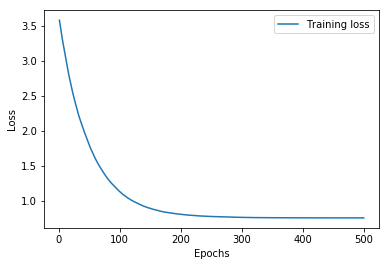

In [26]:
epochs = np.arange(1, 500+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 함수형 API

In [27]:
from tensorflow.keras import Model, Input

input = Input(shape=(1,))
output = Dense(1)(input)

model = Model(input, output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=500, 
                    validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/500
105/105==============================] - 0s 780us/sample - loss: 4.3218 - val_loss: 2.8756
Epoch 2/500
105/105==============================] - 0s 45us/sample - loss: 4.2448 - val_loss: 2.8328
Epoch 3/500
105/105==============================] - 0s 51us/sample - loss: 4.1699 - val_loss: 2.7945
Epoch 4/500
105/105==============================] - 0s 52us/sample - loss: 4.1021 - val_loss: 2.7521
Epoch 5/500
105/105==============================] - 0s 40us/sample - loss: 4.0299 - val_loss: 2.7130
Epoch 6/500
105/105==============================] - 0s 53us/sample - loss: 3.9615 - val_loss: 2.6734
Epoch 7/500
105/105==============================] - 0s 43us/sample - loss: 3.8920 - val_loss: 2.6351
Epoch 8/500
105/105==============================] - 0s 38us/sample - loss: 3.8252 - val_loss: 2.6021
Epoch 9/500
105/105==============================] - 0s 37us/sample - loss: 3.7667 - val_loss: 2.5683
Epoch 10/500
105/105================

105/105==============================] - 0s 41us/sample - loss: 1.4200 - val_loss: 1.2586
Epoch 81/500
105/105==============================] - 0s 44us/sample - loss: 1.4074 - val_loss: 1.2524
Epoch 82/500
105/105==============================] - 0s 39us/sample - loss: 1.3957 - val_loss: 1.2443
Epoch 83/500
105/105==============================] - 0s 33us/sample - loss: 1.3825 - val_loss: 1.2376
Epoch 84/500
105/105==============================] - 0s 37us/sample - loss: 1.3705 - val_loss: 1.2304
Epoch 85/500
105/105==============================] - 0s 46us/sample - loss: 1.3585 - val_loss: 1.2230
Epoch 86/500
105/105==============================] - 0s 51us/sample - loss: 1.3449 - val_loss: 1.2150
Epoch 87/500
105/105==============================] - 0s 51us/sample - loss: 1.3316 - val_loss: 1.2075
Epoch 88/500
105/105==============================] - 0s 41us/sample - loss: 1.3198 - val_loss: 1.2017
Epoch 89/500
105/105==============================] - 0s 35us/sample - loss: 1.3095 - 

105/105==============================] - 0s 38us/sample - loss: 0.8823 - val_loss: 0.9558
Epoch 160/500
105/105==============================] - 0s 37us/sample - loss: 0.8799 - val_loss: 0.9540
Epoch 161/500
105/105==============================] - 0s 35us/sample - loss: 0.8769 - val_loss: 0.9522
Epoch 162/500
105/105==============================] - 0s 33us/sample - loss: 0.8741 - val_loss: 0.9510
Epoch 163/500
105/105==============================] - 0s 35us/sample - loss: 0.8722 - val_loss: 0.9493
Epoch 164/500
105/105==============================] - 0s 34us/sample - loss: 0.8698 - val_loss: 0.9482
Epoch 165/500
105/105==============================] - 0s 34us/sample - loss: 0.8679 - val_loss: 0.9475
Epoch 166/500
105/105==============================] - 0s 41us/sample - loss: 0.8659 - val_loss: 0.9464
Epoch 167/500
105/105==============================] - 0s 39us/sample - loss: 0.8637 - val_loss: 0.9448
Epoch 168/500
105/105==============================] - 0s 36us/sample - loss: 

Epoch 238/500
105/105==============================] - 0s 37us/sample - loss: 0.7810 - val_loss: 0.9062
Epoch 239/500
105/105==============================] - 0s 47us/sample - loss: 0.7803 - val_loss: 0.9060
Epoch 240/500
105/105==============================] - 0s 35us/sample - loss: 0.7797 - val_loss: 0.9057
Epoch 241/500
105/105==============================] - 0s 37us/sample - loss: 0.7792 - val_loss: 0.9056
Epoch 242/500
105/105==============================] - 0s 40us/sample - loss: 0.7786 - val_loss: 0.9052
Epoch 243/500
105/105==============================] - 0s 36us/sample - loss: 0.7781 - val_loss: 0.9056
Epoch 244/500
105/105==============================] - 0s 35us/sample - loss: 0.7775 - val_loss: 0.9054
Epoch 245/500
105/105==============================] - 0s 47us/sample - loss: 0.7773 - val_loss: 0.9050
Epoch 246/500
105/105==============================] - 0s 40us/sample - loss: 0.7767 - val_loss: 0.9050
Epoch 247/500
105/105==============================] - 0s 36us/s

Epoch 317/500
105/105==============================] - 0s 41us/sample - loss: 0.7605 - val_loss: 0.9002
Epoch 318/500
105/105==============================] - 0s 32us/sample - loss: 0.7603 - val_loss: 0.9002
Epoch 319/500
105/105==============================] - 0s 49us/sample - loss: 0.7603 - val_loss: 0.9002
Epoch 320/500
105/105==============================] - 0s 45us/sample - loss: 0.7601 - val_loss: 0.9002
Epoch 321/500
105/105==============================] - 0s 39us/sample - loss: 0.7601 - val_loss: 0.9000
Epoch 322/500
105/105==============================] - 0s 49us/sample - loss: 0.7598 - val_loss: 0.8999
Epoch 323/500
105/105==============================] - 0s 37us/sample - loss: 0.7600 - val_loss: 0.8996
Epoch 324/500
105/105==============================] - 0s 40us/sample - loss: 0.7599 - val_loss: 0.8998
Epoch 325/500
105/105==============================] - 0s 47us/sample - loss: 0.7598 - val_loss: 0.9004
Epoch 326/500
105/105==============================] - 0s 39us/s

Epoch 396/500
105/105==============================] - 0s 37us/sample - loss: 0.7566 - val_loss: 0.9018
Epoch 397/500
105/105==============================] - 0s 49us/sample - loss: 0.7566 - val_loss: 0.9016
Epoch 398/500
105/105==============================] - 0s 48us/sample - loss: 0.7565 - val_loss: 0.9016
Epoch 399/500
105/105==============================] - 0s 40us/sample - loss: 0.7567 - val_loss: 0.9015
Epoch 400/500
105/105==============================] - 0s 36us/sample - loss: 0.7563 - val_loss: 0.9013
Epoch 401/500
105/105==============================] - 0s 54us/sample - loss: 0.7564 - val_loss: 0.9012
Epoch 402/500
105/105==============================] - 0s 37us/sample - loss: 0.7563 - val_loss: 0.9015
Epoch 403/500
105/105==============================] - 0s 38us/sample - loss: 0.7564 - val_loss: 0.9018
Epoch 404/500
105/105==============================] - 0s 39us/sample - loss: 0.7563 - val_loss: 0.9016
Epoch 405/500
105/105==============================] - 0s 42us/s

Epoch 475/500
105/105==============================] - 0s 45us/sample - loss: 0.7558 - val_loss: 0.9033
Epoch 476/500
105/105==============================] - 0s 50us/sample - loss: 0.7559 - val_loss: 0.9034
Epoch 477/500
105/105==============================] - 0s 44us/sample - loss: 0.7558 - val_loss: 0.9034
Epoch 478/500
105/105==============================] - 0s 39us/sample - loss: 0.7559 - val_loss: 0.9030
Epoch 479/500
105/105==============================] - 0s 35us/sample - loss: 0.7558 - val_loss: 0.9028
Epoch 480/500
105/105==============================] - 0s 35us/sample - loss: 0.7557 - val_loss: 0.9031
Epoch 481/500
105/105==============================] - 0s 38us/sample - loss: 0.7556 - val_loss: 0.9031
Epoch 482/500
105/105==============================] - 0s 37us/sample - loss: 0.7556 - val_loss: 0.9029
Epoch 483/500
105/105==============================] - 0s 37us/sample - loss: 0.7556 - val_loss: 0.9030
Epoch 484/500
105/105==============================] - 0s 37us/s

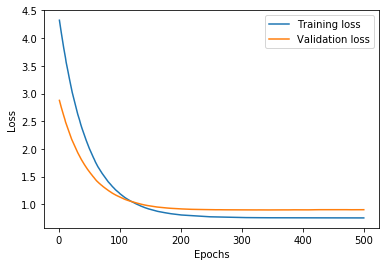

In [29]:
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 과대적합 해결하기

In [30]:
model = Sequential()
model.add(Dense(units=1, input_dim=1, kernel_regularizer='l2'))

In [31]:
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=500, 
                    validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/500
105/105==============================] - 0s 969us/sample - loss: 15.4024 - val_loss: 10.5598
Epoch 2/500
105/105==============================] - 0s 53us/sample - loss: 15.0822 - val_loss: 10.3638
Epoch 3/500
105/105==============================] - 0s 36us/sample - loss: 14.7749 - val_loss: 10.1295
Epoch 4/500
105/105==============================] - 0s 47us/sample - loss: 14.4251 - val_loss: 9.9410
Epoch 5/500
105/105==============================] - 0s 43us/sample - loss: 14.1421 - val_loss: 9.7414
Epoch 6/500
105/105==============================] - 0s 41us/sample - loss: 13.8375 - val_loss: 9.5612
Epoch 7/500
105/105==============================] - 0s 47us/sample - loss: 13.5625 - val_loss: 9.3832
Epoch 8/500
105/105==============================] - 0s 43us/sample - loss: 13.2972 - val_loss: 9.2054
Epoch 9/500
105/105==============================] - 0s 39us/sample - loss: 13.0200 - val_loss: 9.0204
Epoch 10/500
105/105====

Epoch 80/500
105/105==============================] - 0s 50us/sample - loss: 3.3361 - val_loss: 2.7422
Epoch 81/500
105/105==============================] - 0s 51us/sample - loss: 3.2794 - val_loss: 2.7034
Epoch 82/500
105/105==============================] - 0s 38us/sample - loss: 3.2228 - val_loss: 2.6690
Epoch 83/500
105/105==============================] - 0s 48us/sample - loss: 3.1723 - val_loss: 2.6341
Epoch 84/500
105/105==============================] - 0s 41us/sample - loss: 3.1208 - val_loss: 2.5995
Epoch 85/500
105/105==============================] - 0s 41us/sample - loss: 3.0703 - val_loss: 2.5631
Epoch 86/500
105/105==============================] - 0s 38us/sample - loss: 3.0161 - val_loss: 2.5281
Epoch 87/500
105/105==============================] - 0s 41us/sample - loss: 2.9674 - val_loss: 2.4963
Epoch 88/500
105/105==============================] - 0s 41us/sample - loss: 2.9194 - val_loss: 2.4648
Epoch 89/500
105/105==============================] - 0s 44us/sample - lo

Epoch 159/500
105/105==============================] - 0s 46us/sample - loss: 1.2392 - val_loss: 1.3108
Epoch 160/500
105/105==============================] - 0s 56us/sample - loss: 1.2289 - val_loss: 1.3032
Epoch 161/500
105/105==============================] - 0s 47us/sample - loss: 1.2191 - val_loss: 1.2960
Epoch 162/500
105/105==============================] - 0s 35us/sample - loss: 1.2100 - val_loss: 1.2895
Epoch 163/500
105/105==============================] - 0s 38us/sample - loss: 1.2011 - val_loss: 1.2828
Epoch 164/500
105/105==============================] - 0s 35us/sample - loss: 1.1924 - val_loss: 1.2752
Epoch 165/500
105/105==============================] - 0s 56us/sample - loss: 1.1830 - val_loss: 1.2684
Epoch 166/500
105/105==============================] - 0s 43us/sample - loss: 1.1743 - val_loss: 1.2611
Epoch 167/500
105/105==============================] - 0s 37us/sample - loss: 1.1648 - val_loss: 1.2566
Epoch 168/500
105/105==============================] - 0s 41us/s

Epoch 238/500
105/105==============================] - 0s 36us/sample - loss: 0.8625 - val_loss: 1.0224
Epoch 239/500
105/105==============================] - 0s 35us/sample - loss: 0.8608 - val_loss: 1.0207
Epoch 240/500
105/105==============================] - 0s 43us/sample - loss: 0.8589 - val_loss: 1.0186
Epoch 241/500
105/105==============================] - 0s 32us/sample - loss: 0.8566 - val_loss: 1.0166
Epoch 242/500
105/105==============================] - 0s 40us/sample - loss: 0.8546 - val_loss: 1.0148
Epoch 243/500
105/105==============================] - 0s 43us/sample - loss: 0.8527 - val_loss: 1.0133
Epoch 244/500
105/105==============================] - 0s 42us/sample - loss: 0.8511 - val_loss: 1.0120
Epoch 245/500
105/105==============================] - 0s 34us/sample - loss: 0.8499 - val_loss: 1.0107
Epoch 246/500
105/105==============================] - 0s 36us/sample - loss: 0.8482 - val_loss: 1.0088
Epoch 247/500
105/105==============================] - 0s 36us/s

Epoch 317/500
105/105==============================] - 0s 36us/sample - loss: 0.7940 - val_loss: 0.9581
Epoch 318/500
105/105==============================] - 0s 36us/sample - loss: 0.7938 - val_loss: 0.9577
Epoch 319/500
105/105==============================] - 0s 50us/sample - loss: 0.7935 - val_loss: 0.9563
Epoch 320/500
105/105==============================] - 0s 42us/sample - loss: 0.7926 - val_loss: 0.9557
Epoch 321/500
105/105==============================] - 0s 38us/sample - loss: 0.7922 - val_loss: 0.9554
Epoch 322/500
105/105==============================] - 0s 35us/sample - loss: 0.7918 - val_loss: 0.9551
Epoch 323/500
105/105==============================] - 0s 38us/sample - loss: 0.7917 - val_loss: 0.9553
Epoch 324/500
105/105==============================] - 0s 37us/sample - loss: 0.7915 - val_loss: 0.9550
Epoch 325/500
105/105==============================] - 0s 37us/sample - loss: 0.7913 - val_loss: 0.9547
Epoch 326/500
105/105==============================] - 0s 36us/s

Epoch 396/500
105/105==============================] - 0s 35us/sample - loss: 0.7822 - val_loss: 0.9394
Epoch 397/500
105/105==============================] - 0s 38us/sample - loss: 0.7822 - val_loss: 0.9391
Epoch 398/500
105/105==============================] - 0s 36us/sample - loss: 0.7823 - val_loss: 0.9390
Epoch 399/500
105/105==============================] - 0s 37us/sample - loss: 0.7820 - val_loss: 0.9393
Epoch 400/500
105/105==============================] - 0s 35us/sample - loss: 0.7820 - val_loss: 0.9392
Epoch 401/500
105/105==============================] - 0s 42us/sample - loss: 0.7822 - val_loss: 0.9384
Epoch 402/500
105/105==============================] - 0s 35us/sample - loss: 0.7819 - val_loss: 0.9384
Epoch 403/500
105/105==============================] - 0s 35us/sample - loss: 0.7816 - val_loss: 0.9383
Epoch 404/500
105/105==============================] - 0s 42us/sample - loss: 0.7815 - val_loss: 0.9381
Epoch 405/500
105/105==============================] - 0s 40us/s

105/105==============================] - 0s 40us/sample - loss: 0.7796 - val_loss: 0.9351
Epoch 475/500
105/105==============================] - 0s 49us/sample - loss: 0.7797 - val_loss: 0.9349
Epoch 476/500
105/105==============================] - 0s 37us/sample - loss: 0.7797 - val_loss: 0.9347
Epoch 477/500
105/105==============================] - 0s 57us/sample - loss: 0.7796 - val_loss: 0.9348
Epoch 478/500
105/105==============================] - 0s 43us/sample - loss: 0.7798 - val_loss: 0.9347
Epoch 479/500
105/105==============================] - 0s 42us/sample - loss: 0.7796 - val_loss: 0.9345
Epoch 480/500
105/105==============================] - 0s 51us/sample - loss: 0.7796 - val_loss: 0.9347
Epoch 481/500
105/105==============================] - 0s 44us/sample - loss: 0.7796 - val_loss: 0.9347
Epoch 482/500
105/105==============================] - 0s 35us/sample - loss: 0.7796 - val_loss: 0.9348
Epoch 483/500
105/105==============================] - 0s 41us/sample - loss: 

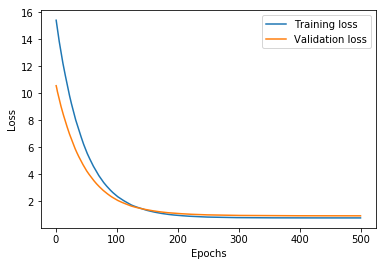

In [32]:
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
model = Sequential()
model.add(Dense(units=1, input_dim=1, kernel_regularizer='l2'))

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

callback_list = [EarlyStopping(patience=5)]
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=500, 
                    callbacks=callback_list, validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/500
105/105==============================] - 0s 1ms/sample - loss: 8.0516 - val_loss: 5.3857
Epoch 2/500
105/105==============================] - 0s 38us/sample - loss: 7.9011 - val_loss: 5.2859
Epoch 3/500
105/105==============================] - 0s 48us/sample - loss: 7.7406 - val_loss: 5.1954
Epoch 4/500
105/105==============================] - 0s 42us/sample - loss: 7.5969 - val_loss: 5.1100
Epoch 5/500
105/105==============================] - 0s 38us/sample - loss: 7.4590 - val_loss: 5.0182
Epoch 6/500
105/105==============================] - 0s 35us/sample - loss: 7.3115 - val_loss: 4.9367
Epoch 7/500
105/105==============================] - 0s 34us/sample - loss: 7.1809 - val_loss: 4.8442
Epoch 8/500
105/105==============================] - 0s 36us/sample - loss: 7.0322 - val_loss: 4.7708
Epoch 9/500
105/105==============================] - 0s 34us/sample - loss: 6.9121 - val_loss: 4.6902
Epoch 10/500
105/105==================

105/105==============================] - 0s 36us/sample - loss: 2.0821 - val_loss: 1.7611
Epoch 81/500
105/105==============================] - 0s 35us/sample - loss: 2.0528 - val_loss: 1.7451
Epoch 82/500
105/105==============================] - 0s 42us/sample - loss: 2.0264 - val_loss: 1.7267
Epoch 83/500
105/105==============================] - 0s 38us/sample - loss: 1.9970 - val_loss: 1.7097
Epoch 84/500
105/105==============================] - 0s 34us/sample - loss: 1.9702 - val_loss: 1.6944
Epoch 85/500
105/105==============================] - 0s 33us/sample - loss: 1.9461 - val_loss: 1.6787
Epoch 86/500
105/105==============================] - 0s 38us/sample - loss: 1.9201 - val_loss: 1.6624
Epoch 87/500
105/105==============================] - 0s 49us/sample - loss: 1.8942 - val_loss: 1.6494
Epoch 88/500
105/105==============================] - 0s 48us/sample - loss: 1.8723 - val_loss: 1.6345
Epoch 89/500
105/105==============================] - 0s 39us/sample - loss: 1.8496 - 

105/105==============================] - 0s 41us/sample - loss: 1.0228 - val_loss: 1.1009
Epoch 160/500
105/105==============================] - 0s 37us/sample - loss: 1.0182 - val_loss: 1.0972
Epoch 161/500
105/105==============================] - 0s 38us/sample - loss: 1.0122 - val_loss: 1.0942
Epoch 162/500
105/105==============================] - 0s 38us/sample - loss: 1.0073 - val_loss: 1.0918
Epoch 163/500
105/105==============================] - 0s 41us/sample - loss: 1.0032 - val_loss: 1.0886
Epoch 164/500
105/105==============================] - 0s 36us/sample - loss: 0.9987 - val_loss: 1.0858
Epoch 165/500
105/105==============================] - 0s 34us/sample - loss: 0.9947 - val_loss: 1.0832
Epoch 166/500
105/105==============================] - 0s 35us/sample - loss: 0.9906 - val_loss: 1.0809
Epoch 167/500
105/105==============================] - 0s 38us/sample - loss: 0.9871 - val_loss: 1.0781
Epoch 168/500
105/105==============================] - 0s 57us/sample - loss: 

Epoch 238/500
105/105==============================] - 0s 53us/sample - loss: 0.8249 - val_loss: 0.9650
Epoch 239/500
105/105==============================] - 0s 34us/sample - loss: 0.8241 - val_loss: 0.9644
Epoch 240/500
105/105==============================] - 0s 36us/sample - loss: 0.8231 - val_loss: 0.9635
Epoch 241/500
105/105==============================] - 0s 41us/sample - loss: 0.8220 - val_loss: 0.9634
Epoch 242/500
105/105==============================] - 0s 48us/sample - loss: 0.8217 - val_loss: 0.9628
Epoch 243/500
105/105==============================] - 0s 37us/sample - loss: 0.8208 - val_loss: 0.9623
Epoch 244/500
105/105==============================] - 0s 41us/sample - loss: 0.8200 - val_loss: 0.9618
Epoch 245/500
105/105==============================] - 0s 38us/sample - loss: 0.8191 - val_loss: 0.9610
Epoch 246/500
105/105==============================] - 0s 32us/sample - loss: 0.8182 - val_loss: 0.9602
Epoch 247/500
105/105==============================] - 0s 38us/s

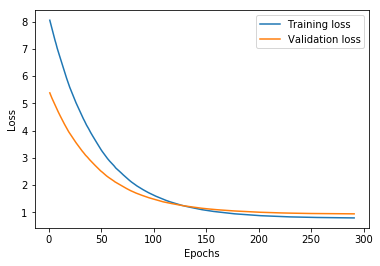

In [35]:
epochs = np.arange(1, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 케라스 모델 저장과 복원

In [36]:
model.save_weights('simple_regression.h5')

In [37]:
model = Sequential()
model.add(Dense(units=1, input_dim=1))
model.compile(optimizer='sgd', loss='mse')

model.load_weights('simple_regression.h5')

In [38]:
model.evaluate(x_test, y_test)

50/50==============================] - 0s 919us/sample - loss: 0.9540


0.9540133500099182

In [39]:
model.save('simple_model.h5')

In [40]:
from tensorflow.keras.models import load_model

model = load_model('simple_model.h5')
model.evaluate(x_test, y_test)

50/50==============================] - 0s 998us/sample - loss: 0.9540


0.9540133500099182

In [41]:
model = Sequential()
model.add(Dense(units=1, input_dim=1))
model.compile(optimizer='sgd', loss='mse')

from tensorflow.keras.callbacks import ModelCheckpoint

callback_list = [ModelCheckpoint(filepath='my_model.h5', 
                                 monitor='val_loss', save_best_only=True)]
history = model.fit(x_train, y_train, epochs=500, 
                    validation_split=0.2, callbacks=callback_list)

Train on 120 samples, validate on 30 samples
Epoch 1/500
120/120==============================] - 0s 1ms/sample - loss: 1.9541 - val_loss: 1.2799
Epoch 2/500
120/120==============================] - 0s 58us/sample - loss: 1.9346 - val_loss: 1.2692
Epoch 3/500
120/120==============================] - 0s 60us/sample - loss: 1.9152 - val_loss: 1.2583
Epoch 4/500
120/120==============================] - 0s 57us/sample - loss: 1.8950 - val_loss: 1.2479
Epoch 5/500
120/120==============================] - 0s 55us/sample - loss: 1.8755 - val_loss: 1.2377
Epoch 6/500
120/120==============================] - 0s 57us/sample - loss: 1.8570 - val_loss: 1.2278
Epoch 7/500
120/120==============================] - 0s 72us/sample - loss: 1.8389 - val_loss: 1.2180
Epoch 8/500
120/120==============================] - 0s 60us/sample - loss: 1.8211 - val_loss: 1.2084
Epoch 9/500
120/120==============================] - 0s 64us/sample - loss: 1.8034 - val_loss: 1.1990
Epoch 10/500
120/120==================

Epoch 80/500
120/120==============================] - 0s 60us/sample - loss: 1.0905 - val_loss: 0.8539
Epoch 81/500
120/120==============================] - 0s 53us/sample - loss: 1.0854 - val_loss: 0.8519
Epoch 82/500
120/120==============================] - 0s 59us/sample - loss: 1.0803 - val_loss: 0.8500
Epoch 83/500
120/120==============================] - 0s 56us/sample - loss: 1.0753 - val_loss: 0.8481
Epoch 84/500
120/120==============================] - 0s 67us/sample - loss: 1.0705 - val_loss: 0.8462
Epoch 85/500
120/120==============================] - 0s 59us/sample - loss: 1.0659 - val_loss: 0.8444
Epoch 86/500
120/120==============================] - 0s 75us/sample - loss: 1.0613 - val_loss: 0.8426
Epoch 87/500
120/120==============================] - 0s 60us/sample - loss: 1.0566 - val_loss: 0.8409
Epoch 88/500
120/120==============================] - 0s 56us/sample - loss: 1.0521 - val_loss: 0.8391
Epoch 89/500
120/120==============================] - 0s 62us/sample - lo

Epoch 159/500
120/120==============================] - 0s 62us/sample - loss: 0.8688 - val_loss: 0.7899
Epoch 160/500
120/120==============================] - 0s 55us/sample - loss: 0.8676 - val_loss: 0.7899
Epoch 161/500
120/120==============================] - 0s 61us/sample - loss: 0.8664 - val_loss: 0.7897
Epoch 162/500
120/120==============================] - 0s 62us/sample - loss: 0.8649 - val_loss: 0.7896
Epoch 163/500
120/120==============================] - 0s 61us/sample - loss: 0.8637 - val_loss: 0.7896
Epoch 164/500
120/120==============================] - 0s 56us/sample - loss: 0.8624 - val_loss: 0.7895
Epoch 165/500
120/120==============================] - 0s 57us/sample - loss: 0.8612 - val_loss: 0.7895
Epoch 166/500
120/120==============================] - 0s 53us/sample - loss: 0.8600 - val_loss: 0.7894
Epoch 167/500
120/120==============================] - 0s 66us/sample - loss: 0.8589 - val_loss: 0.7894
Epoch 168/500
120/120==============================] - 0s 66us/s

Epoch 238/500
120/120==============================] - 0s 29us/sample - loss: 0.8097 - val_loss: 0.7974
Epoch 239/500
120/120==============================] - 0s 27us/sample - loss: 0.8094 - val_loss: 0.7976
Epoch 240/500
120/120==============================] - 0s 29us/sample - loss: 0.8090 - val_loss: 0.7978
Epoch 241/500
120/120==============================] - 0s 33us/sample - loss: 0.8087 - val_loss: 0.7980
Epoch 242/500
120/120==============================] - 0s 34us/sample - loss: 0.8084 - val_loss: 0.7982
Epoch 243/500
120/120==============================] - 0s 25us/sample - loss: 0.8079 - val_loss: 0.7984
Epoch 244/500
120/120==============================] - 0s 29us/sample - loss: 0.8076 - val_loss: 0.7986
Epoch 245/500
120/120==============================] - 0s 49us/sample - loss: 0.8073 - val_loss: 0.7987
Epoch 246/500
120/120==============================] - 0s 29us/sample - loss: 0.8070 - val_loss: 0.7989
Epoch 247/500
120/120==============================] - 0s 25us/s

Epoch 317/500
120/120==============================] - 0s 28us/sample - loss: 0.7938 - val_loss: 0.8120
Epoch 318/500
120/120==============================] - 0s 43us/sample - loss: 0.7936 - val_loss: 0.8122
Epoch 319/500
120/120==============================] - 0s 31us/sample - loss: 0.7936 - val_loss: 0.8124
Epoch 320/500
120/120==============================] - 0s 36us/sample - loss: 0.7934 - val_loss: 0.8126
Epoch 321/500
120/120==============================] - 0s 28us/sample - loss: 0.7933 - val_loss: 0.8127
Epoch 322/500
120/120==============================] - 0s 37us/sample - loss: 0.7933 - val_loss: 0.8129
Epoch 323/500
120/120==============================] - 0s 28us/sample - loss: 0.7933 - val_loss: 0.8131
Epoch 324/500
120/120==============================] - 0s 29us/sample - loss: 0.7930 - val_loss: 0.8132
Epoch 325/500
120/120==============================] - 0s 42us/sample - loss: 0.7930 - val_loss: 0.8134
Epoch 326/500
120/120==============================] - 0s 42us/s

Epoch 396/500
120/120==============================] - 0s 28us/sample - loss: 0.7895 - val_loss: 0.8226
Epoch 397/500
120/120==============================] - 0s 34us/sample - loss: 0.7895 - val_loss: 0.8226
Epoch 398/500
120/120==============================] - 0s 35us/sample - loss: 0.7894 - val_loss: 0.8228
Epoch 399/500
120/120==============================] - 0s 28us/sample - loss: 0.7896 - val_loss: 0.8228
Epoch 400/500
120/120==============================] - 0s 29us/sample - loss: 0.7896 - val_loss: 0.8229
Epoch 401/500
120/120==============================] - 0s 30us/sample - loss: 0.7894 - val_loss: 0.8230
Epoch 402/500
120/120==============================] - 0s 27us/sample - loss: 0.7894 - val_loss: 0.8231
Epoch 403/500
120/120==============================] - 0s 32us/sample - loss: 0.7893 - val_loss: 0.8232
Epoch 404/500
120/120==============================] - 0s 39us/sample - loss: 0.7892 - val_loss: 0.8234
Epoch 405/500
120/120==============================] - 0s 28us/s

Epoch 475/500
120/120==============================] - 0s 29us/sample - loss: 0.7882 - val_loss: 0.8285
Epoch 476/500
120/120==============================] - 0s 30us/sample - loss: 0.7882 - val_loss: 0.8286
Epoch 477/500
120/120==============================] - 0s 30us/sample - loss: 0.7885 - val_loss: 0.8286
Epoch 478/500
120/120==============================] - 0s 31us/sample - loss: 0.7882 - val_loss: 0.8287
Epoch 479/500
120/120==============================] - 0s 34us/sample - loss: 0.7883 - val_loss: 0.8288
Epoch 480/500
120/120==============================] - 0s 29us/sample - loss: 0.7881 - val_loss: 0.8288
Epoch 481/500
120/120==============================] - 0s 34us/sample - loss: 0.7882 - val_loss: 0.8289
Epoch 482/500
120/120==============================] - 0s 31us/sample - loss: 0.7883 - val_loss: 0.8289
Epoch 483/500
120/120==============================] - 0s 33us/sample - loss: 0.7882 - val_loss: 0.8290
Epoch 484/500
120/120==============================] - 0s 28us/s

Restoring the saved model:

In [42]:
model = load_model('simple_model.h5')
model.load_weights('my_model.h5')
model.evaluate(x_test, y_test)

50/50==============================] - 0s 1ms/sample - loss: 1.0239


1.0238643383979797

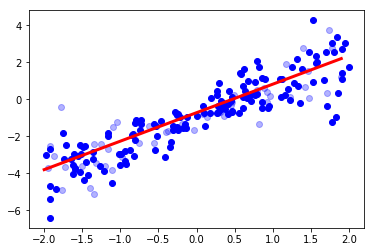

In [43]:
x_arr = np.arange(-2, 2, 0.1)
y_arr = model.predict(x_arr)

plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr, '-r', lw=3)
# plt.savefig('images/14_05.png', dpi=400)
plt.show()

## 텐서를 다차원 배열로 변환하기

In [44]:
arr = np.array([[1., 2., 3., 3.5],
                [4., 5., 6., 6.5],
                [7., 8., 9., 9.5]])
T1 = tf.constant(arr)
print(T1)
s = T1.get_shape()
print('T1의 크기:', s)
print('T1의 크기:', T1.shape)
T2 = tf.Variable(np.random.normal(size=s))
print(T2)
T3 = tf.Variable(np.random.normal(size=s[0]))
print(T3)

tf.Tensor(
[[1.  2.  3.  3.5]
 [4.  5.  6.  6.5]
 [7.  8.  9.  9.5]], shape=(3, 4), dtype=float64)
T1의 크기: (3, 4)
T1의 크기: (3, 4)
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float64, numpy=
array([[ 1.00077942,  0.76718517,  0.7585358 , -0.10983495],
       [ 0.10824642, -0.0648924 ,  1.20550726,  0.59442177],
       [-0.21372099,  0.32027211, -0.34539183,  0.94037937]])>
<tf.Variable 'Variable:0' shape=(3,) dtype=float64, numpy=array([ 1.07797999, -0.48164379,  0.15853372])>


In [45]:
T4 = tf.reshape(T1, shape=[1, 1, -1])
print(T4)
T5 = tf.reshape(T1, shape=[1, 3, -1])
print(T5)

tf.Tensor([[[1.  2.  3.  3.5 4.  5.  6.  6.5 7.  8.  9.  9.5]]], shape=(1, 1, 12), dtype=float64)
tf.Tensor(
[[[1.  2.  3.  3.5]
  [4.  5.  6.  6.5]
  [7.  8.  9.  9.5]]], shape=(1, 3, 4), dtype=float64)


In [46]:
T6 = tf.transpose(T5, perm=[2, 1, 0])
print(T6)
T7 = tf.transpose(T5, perm=[0, 2, 1])
print(T7)

tf.Tensor(
[[[1. ]
  [4. ]
  [7. ]]

 [[2. ]
  [5. ]
  [8. ]]

 [[3. ]
  [6. ]
  [9. ]]

 [[3.5]
  [6.5]
  [9.5]]], shape=(4, 3, 1), dtype=float64)
tf.Tensor(
[[[1.  4.  7. ]
  [2.  5.  8. ]
  [3.  6.  9. ]
  [3.5 6.5 9.5]]], shape=(1, 4, 3), dtype=float64)


In [47]:
t5_splt = tf.split(T5, 
                   num_or_size_splits=2, 
                   axis=2)
print(t5_splt)

[<tf.Tensor: id=79303, shape=(1, 3, 2), dtype=float64, numpy=
array([[[1., 2.],
        [4., 5.],
        [7., 8.]]])>, <tf.Tensor: id=79304, shape=(1, 3, 2), dtype=float64, numpy=
array([[[3. , 3.5],
        [6. , 6.5],
        [9. , 9.5]]])>]


In [48]:
t1 = tf.ones(shape=(5, 1), dtype=tf.float32)
t2 = tf.zeros(shape=(5, 1), dtype=tf.float32)
print(t1)
print(t2)

t3 = tf.concat([t1, t2], axis=0)
print(t3)
t4 = tf.concat([t1, t2], axis=1)
print(t4)

tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(10, 1), dtype=float32)
tf.Tensor(
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]], shape=(5, 2), dtype=float32)


## Visualizing the graph with TensorBoard

In [49]:
model = Sequential()
model.add(Dense(units=1, input_dim=1, kernel_regularizer='l2'))

In [50]:
from tensorflow.keras.callbacks import TensorBoard

callback_list = [TensorBoard()]
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=500, 
                    callbacks=callback_list, validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/500
105/105==============================] - 0s 2ms/sample - loss: 7.9064 - val_loss: 5.2901
Epoch 2/500
105/105==============================] - 0s 44us/sample - loss: 7.7675 - val_loss: 5.1964
Epoch 3/500
105/105==============================] - 0s 42us/sample - loss: 7.6195 - val_loss: 5.1116
Epoch 4/500
105/105==============================] - 0s 43us/sample - loss: 7.4790 - val_loss: 5.0235
Epoch 5/500
105/105==============================] - 0s 39us/sample - loss: 7.3378 - val_loss: 4.9412
Epoch 6/500
105/105==============================] - 0s 46us/sample - loss: 7.2040 - val_loss: 4.8616
Epoch 7/500
105/105==============================] - 0s 41us/sample - loss: 7.0735 - val_loss: 4.7661
Epoch 8/500
105/105==============================] - 0s 39us/sample - loss: 6.9169 - val_loss: 4.6810
Epoch 9/500
105/105==============================] - 0s 49us/sample - loss: 6.7828 - val_loss: 4.6021
Epoch 10/500
105/105==================

105/105==============================] - 0s 40us/sample - loss: 2.0798 - val_loss: 1.7485
Epoch 81/500
105/105==============================] - 0s 40us/sample - loss: 2.0540 - val_loss: 1.7321
Epoch 82/500
105/105==============================] - 0s 38us/sample - loss: 2.0268 - val_loss: 1.7152
Epoch 83/500
105/105==============================] - 0s 41us/sample - loss: 2.0000 - val_loss: 1.6980
Epoch 84/500
105/105==============================] - 0s 55us/sample - loss: 1.9738 - val_loss: 1.6827
Epoch 85/500
105/105==============================] - 0s 44us/sample - loss: 1.9489 - val_loss: 1.6669
Epoch 86/500
105/105==============================] - 0s 53us/sample - loss: 1.9238 - val_loss: 1.6524
Epoch 87/500
105/105==============================] - 0s 44us/sample - loss: 1.8997 - val_loss: 1.6356
Epoch 88/500
105/105==============================] - 0s 52us/sample - loss: 1.8735 - val_loss: 1.6196
Epoch 89/500
105/105==============================] - 0s 38us/sample - loss: 1.8482 - 

105/105==============================] - 0s 40us/sample - loss: 1.0119 - val_loss: 1.0849
Epoch 160/500
105/105==============================] - 0s 50us/sample - loss: 1.0076 - val_loss: 1.0822
Epoch 161/500
105/105==============================] - 0s 40us/sample - loss: 1.0032 - val_loss: 1.0790
Epoch 162/500
105/105==============================] - 0s 42us/sample - loss: 0.9984 - val_loss: 1.0766
Epoch 163/500
105/105==============================] - 0s 40us/sample - loss: 0.9944 - val_loss: 1.0731
Epoch 164/500
105/105==============================] - 0s 38us/sample - loss: 0.9897 - val_loss: 1.0707
Epoch 165/500
105/105==============================] - 0s 38us/sample - loss: 0.9858 - val_loss: 1.0691
Epoch 166/500
105/105==============================] - 0s 51us/sample - loss: 0.9826 - val_loss: 1.0667
Epoch 167/500
105/105==============================] - 0s 46us/sample - loss: 0.9788 - val_loss: 1.0638
Epoch 168/500
105/105==============================] - 0s 40us/sample - loss: 

Epoch 238/500
105/105==============================] - 0s 49us/sample - loss: 0.8227 - val_loss: 0.9596
Epoch 239/500
105/105==============================] - 0s 41us/sample - loss: 0.8217 - val_loss: 0.9583
Epoch 240/500
105/105==============================] - 0s 42us/sample - loss: 0.8204 - val_loss: 0.9586
Epoch 241/500
105/105==============================] - 0s 38us/sample - loss: 0.8202 - val_loss: 0.9581
Epoch 242/500
105/105==============================] - 0s 38us/sample - loss: 0.8190 - val_loss: 0.9575
Epoch 243/500
105/105==============================] - 0s 57us/sample - loss: 0.8184 - val_loss: 0.9565
Epoch 244/500
105/105==============================] - 0s 51us/sample - loss: 0.8174 - val_loss: 0.9563
Epoch 245/500
105/105==============================] - 0s 39us/sample - loss: 0.8170 - val_loss: 0.9561
Epoch 246/500
105/105==============================] - 0s 39us/sample - loss: 0.8162 - val_loss: 0.9556
Epoch 247/500
105/105==============================] - 0s 45us/s

Epoch 317/500
105/105==============================] - 0s 44us/sample - loss: 0.7869 - val_loss: 0.9348
Epoch 318/500
105/105==============================] - 0s 44us/sample - loss: 0.7868 - val_loss: 0.9344
Epoch 319/500
105/105==============================] - 0s 47us/sample - loss: 0.7866 - val_loss: 0.9347
Epoch 320/500
105/105==============================] - 0s 46us/sample - loss: 0.7867 - val_loss: 0.9351
Epoch 321/500
105/105==============================] - 0s 41us/sample - loss: 0.7864 - val_loss: 0.9351
Epoch 322/500
105/105==============================] - 0s 41us/sample - loss: 0.7863 - val_loss: 0.9351
Epoch 323/500
105/105==============================] - 0s 39us/sample - loss: 0.7861 - val_loss: 0.9351
Epoch 324/500
105/105==============================] - 0s 42us/sample - loss: 0.7864 - val_loss: 0.9349
Epoch 325/500
105/105==============================] - 0s 38us/sample - loss: 0.7857 - val_loss: 0.9347
Epoch 326/500
105/105==============================] - 0s 48us/s

Epoch 396/500
105/105==============================] - 0s 39us/sample - loss: 0.7807 - val_loss: 0.9310
Epoch 397/500
105/105==============================] - 0s 41us/sample - loss: 0.7805 - val_loss: 0.9308
Epoch 398/500
105/105==============================] - 0s 46us/sample - loss: 0.7803 - val_loss: 0.9311
Epoch 399/500
105/105==============================] - 0s 45us/sample - loss: 0.7804 - val_loss: 0.9313
Epoch 400/500
105/105==============================] - 0s 51us/sample - loss: 0.7803 - val_loss: 0.9315
Epoch 401/500
105/105==============================] - 0s 39us/sample - loss: 0.7804 - val_loss: 0.9317
Epoch 402/500
105/105==============================] - 0s 39us/sample - loss: 0.7805 - val_loss: 0.9318
Epoch 403/500
105/105==============================] - 0s 53us/sample - loss: 0.7804 - val_loss: 0.9315
Epoch 404/500
105/105==============================] - 0s 39us/sample - loss: 0.7803 - val_loss: 0.9310
Epoch 405/500
105/105==============================] - 0s 39us/s

Epoch 475/500
105/105==============================] - 0s 44us/sample - loss: 0.7796 - val_loss: 0.9335
Epoch 476/500
105/105==============================] - 0s 61us/sample - loss: 0.7796 - val_loss: 0.9332
Epoch 477/500
105/105==============================] - 0s 48us/sample - loss: 0.7796 - val_loss: 0.9338
Epoch 478/500
105/105==============================] - 0s 41us/sample - loss: 0.7797 - val_loss: 0.9338
Epoch 479/500
105/105==============================] - 0s 52us/sample - loss: 0.7796 - val_loss: 0.9338
Epoch 480/500
105/105==============================] - 0s 36us/sample - loss: 0.7797 - val_loss: 0.9339
Epoch 481/500
105/105==============================] - 0s 53us/sample - loss: 0.7797 - val_loss: 0.9343
Epoch 482/500
105/105==============================] - 0s 40us/sample - loss: 0.7797 - val_loss: 0.9341
Epoch 483/500
105/105==============================] - 0s 41us/sample - loss: 0.7796 - val_loss: 0.9340
Epoch 484/500
105/105==============================] - 0s 44us/s

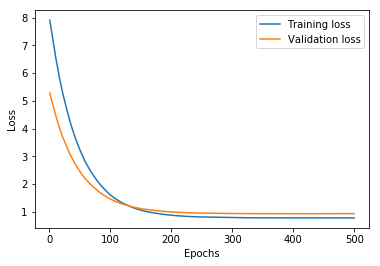

In [51]:
epochs = np.arange(1, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [52]:
input = Input(shape=(784,))
hidden = Dense(100)(input)
output = Dense(10)(hidden)

model = Model(input, output)

In [53]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_1.png')

![text](model_1.png)

In [54]:
plot_model(model, show_shapes=True, to_file='model_2.png')

![text](model_2.png)